### **Electricity Production Forecasting using SARIMAX**

In [ ]:

!pip install pmdarima -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ele_df = pd.read_csv('/content/Electric_Production.csv')

In [ ]:
ele_df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
ele_df.shape

(397, 2)

(397, 2)

In [ ]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
##Converting the Datatime of object to the date tiem

ele_df['DATE'] = pd.to_datetime(ele_df['DATE'])


In [ ]:
ele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [ ]:
#set index
ele_df.set_index('DATE',inplace = True)

In [ ]:
ele_df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### **Plotting the Data:**

Text(0.5, 1.0, 'Plottimg Electirc Producation')

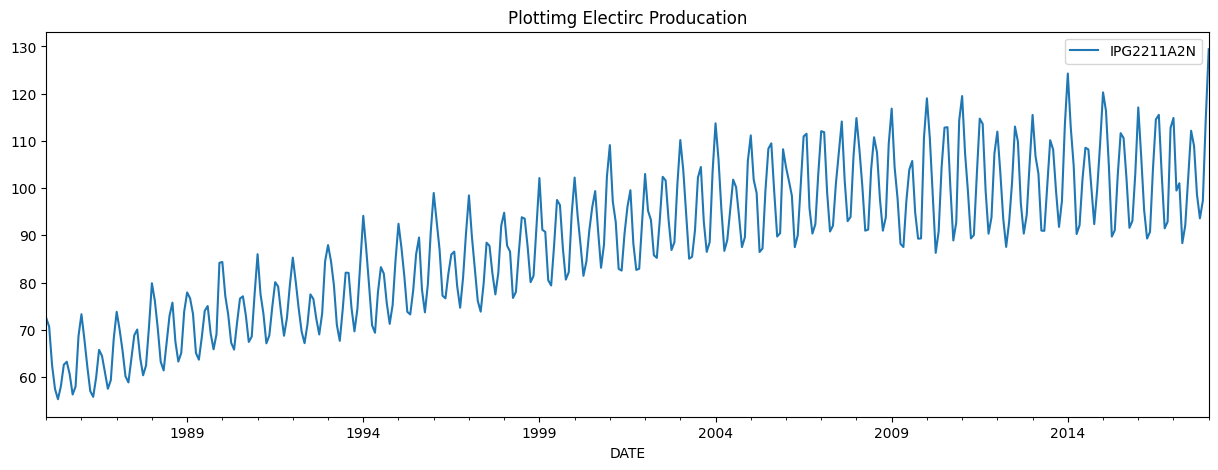

In [ ]:
##Plotting
ele_df.plot(figsize = (15,5))
plt.title('Plottimg Electirc Producation')
#there is a sesonality

### **Stationarity Testing:**

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test function
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')  # ADF test statistic
    print(f'p-value: {result[1]}')        # p-value of the test
    print(f'# of lags used: {result[2]}')  # Number of lags used in the test
    print(f'# of observations used: {result[3]}')  # Number of observations used for the test
    print('Critical Values:')
    for key, value in result[4].items():   # Critical values at 1%, 5%, and 10% levels
        print(f'   {key}: {value}')

    # Conclusion
    if result[1] <= 0.05:
        print('Reject the Null Hypothesis - Data is Stationary')
    else:
        print('Accept the Null Hypothesis - Data is not Stationary')


In [ ]:
adf_test(ele_df['IPG2211A2N'])

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
# of lags used: 15
# of observations used: 381
Critical Values:
   1%: -3.4476305904172904
   5%: -2.869155980820355
   10%: -2.570827146203181
Accept the Null Hypothesis - Data is not Stationary


### **Differencing:**

In [ ]:
# differncing
ele_df['Order_12'] = ele_df['IPG2211A2N'] - ele_df['IPG2211A2N'].shift(12)

In [ ]:

ele_df.head(15)

,IPG2211A2N,Order_12
DATE,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,NaN
1985-03-01,62.4502,NaN
1985-04-01,57.4714,NaN
1985-05-01,55.3151,NaN
1985-06-01,58.0904,NaN
1985-07-01,62.6202,NaN
1985-08-01,63.2485,NaN
1985-09-01,60.5846,NaN


### **Testing for Stationarity After Differencing:**

In [ ]:

adf_test(ele_df['Order_12'].dropna())


ADF Statistic: -5.673482023381762
p-value: 8.812644938088861e-07
# of lags used: 12
# of observations used: 372
Critical Values:
   1%: -3.4480516066132636
   5%: -2.869340997473759
   10%: -2.5709257824604
Reject the Null Hypothesis - Data is Stationary


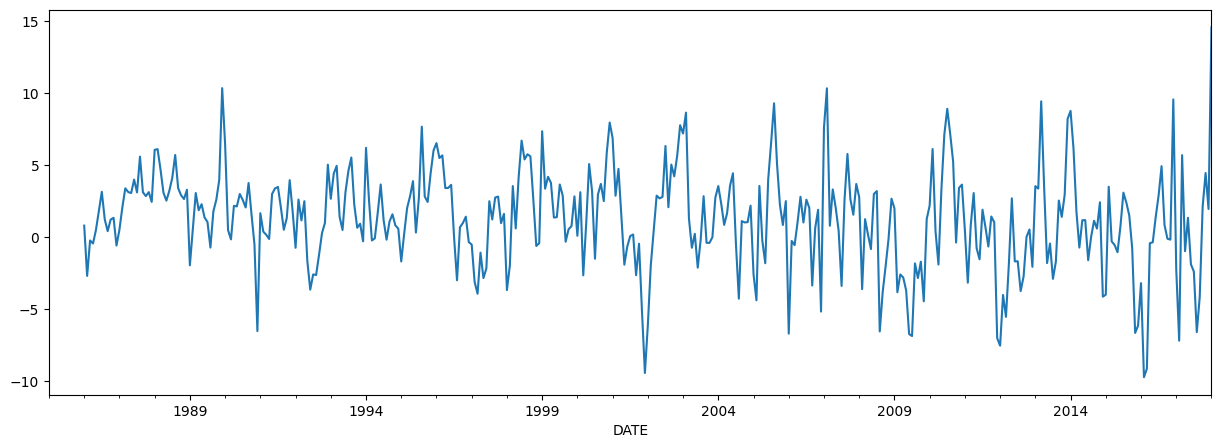

In [ ]:
ele_df['Order_12'].plot(figsize = (15, 5));

### **ACF and PACF Plots:**

- Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).
- plots are created to help identify the appropriate parameters (p, d, q) for the ARIMA model.

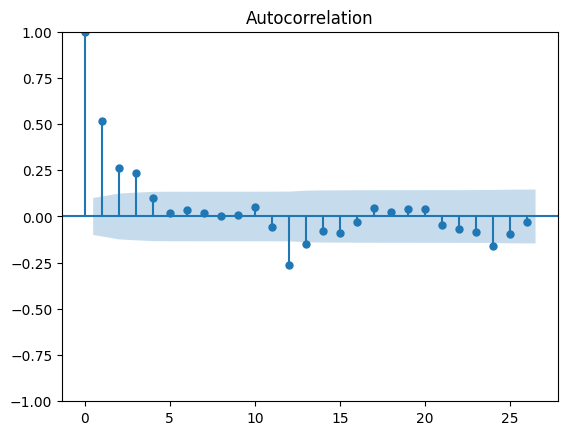

In [ ]:
# acf plot
acf = plot_acf(ele_df['Order_12'].dropna())

p = 1

d =

q = 3

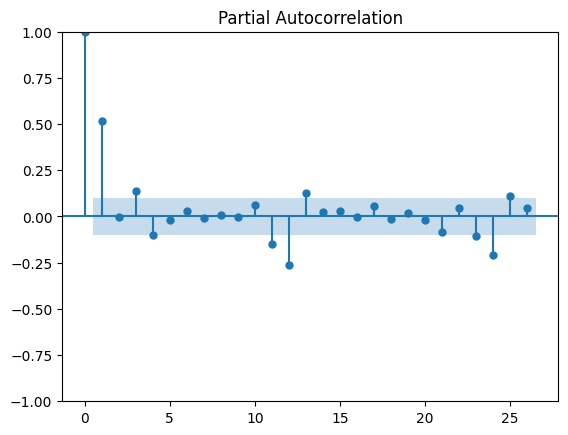

In [ ]:
#obtaining p,d,q
# pacf plot
pacf = plot_pacf(ele_df['Order_12'].dropna())


p = 1
d =
q =


In [ ]:
size = int(0.80 * len(ele_df))
size

317

In [ ]:
len(ele_df)

397

### **Train-Test Split:**
- The data is split into training (80%) and testing (20%) sets for model training and evaluation.

In [ ]:
train = ele_df[:315]
test = ele_df[315:]


### **Auto ARIMA:**
- he auto_arima function is used to automatically determine the best ARIMA parameters (p, d, q) based on the training data.

In [ ]:
# Auto ARIMA to determine the best parameters
from pmdarima import auto_arima

stepwise_fit = auto_arima(train['IPG2211A2N'], seasonal=True, m=12) #we took split is 12

In [ ]:
# Print the best parameters
print(stepwise_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -670.152
Date:                              Fri, 04 Oct 2024   AIC                           1352.305
Time:                                      06:14:17   BIC                           1374.587
Sample:                                  01-01-1985   HQIC                          1361.219
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.069      1.729      0.084      -0.016       0.254
ar.L1          0.92

### **Fitting the SARIMAX Model:**
- The SARIMAX model is fitted to the training data using the best parameters obtained from auto_arima.

In [ ]:

# Fit the SARIMAX model with the best parameters from auto_arima
model = SARIMAX(train['IPG2211A2N'],
                order = stepwise_fit.order,
                seasonal_order = stepwise_fit.seasonal_order)

In [ ]:
fitted_model = model.fit(disp=False)

In [ ]:
print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           IPG2211A2N   No. Observations:                  315
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -673.350
Date:                              Fri, 04 Oct 2024   AIC                           1356.700
Time:                                      06:16:57   BIC                           1375.268
Sample:                                  01-01-1985   HQIC                          1364.129
                                       - 03-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9981      0.003    345.426      0.000       0.992       1.004
ma.L1         -0.41

In [ ]:
###
test.head()

,IPG2211A2N,Order_12
DATE,,
2011-04-01,89.3583,3.0583
2011-05-01,90.0698,-0.7666
2011-06-01,102.8204,-1.5334
2011-07-01,114.7068,1.9002
2011-08-01,113.5958,0.6944


### **Making Predictions:**
- Predictions are made on the test set using the fitted SARIMAX model.

In [ ]:
##Preictions
pred = fitted_model.predict(start = test.index[0], end = test.index[-1])

In [ ]:


test['Sarimax_pred'] = pred

In [ ]:
test.head()

,IPG2211A2N,Order_12,Sarimax_pred
DATE,,,
2011-04-01,89.3583,3.0583,90.159333
2011-05-01,90.0698,-0.7666,92.056593
2011-06-01,102.8204,-1.5334,102.981221
2011-07-01,114.7068,1.9002,110.711943
2011-08-01,113.5958,0.6944,111.491746


### **Plotting Predictions:**
- A plot is created to visualize the actual test values and the forecasted values from the SARIMAX model.

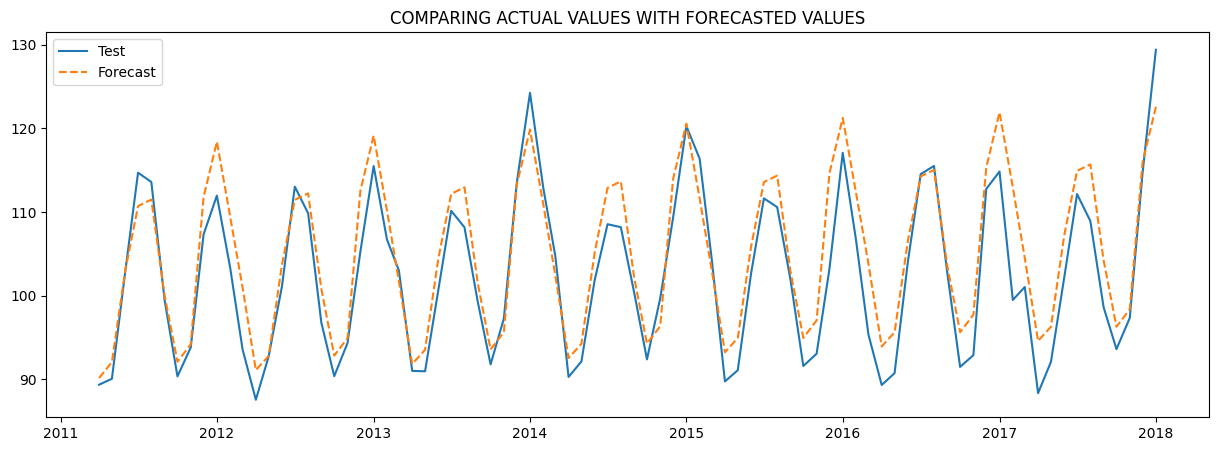

In [ ]:

# Plotting actual vs forecasted values
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['IPG2211A2N'], label='Test')
plt.plot(test.index, test['Sarimax_pred'], label='Forecast', linestyle='--')
plt.title('COMPARING ACTUAL VALUES WITH FORECASTED VALUES');
plt.legend()

In [ ]:
test.index

DatetimeIndex(['2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01',
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01',
               '2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
      

### **Summary:**
Overall, the workflow involves:

- Loading and preparing the electricity production data.

- Analyzing the time series for stationarity and seasonality.

- Using the SARIMAX model to forecast future electricity production based on historical data.

- Evaluating the model's performance by comparing its predictions to the actual test values.